### Importación de datos



In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [42]:
print(f"Ingreso total tienda 1: {tienda.Precio.sum()}")

Ingreso total tienda 1: 1150880400.0


In [43]:
print(f"Ingreso total tienda 2: {tienda2.Precio.sum()}")

Ingreso total tienda 2: 1116343500.0


In [44]:
print(f"Ingreso total tienda 3: {tienda3.Precio.sum()}")

Ingreso total tienda 3: 1098019600.0


In [45]:
print(f"Ingreso total tienda 4: {tienda4.Precio.sum()}")

Ingreso total tienda 4: 1038375700.0


# 2. Ventas por categoría

In [46]:
# Tienda 1
tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)

Categoría del Producto
Muebles                    1446
Electrónicos               1341
Electrodomésticos           906
Juguetes                    872
Deportes y diversión        796
Instrumentos musicales      573
Libros                      520
Artículos para el hogar     489
Name: Cantidad de cuotas, dtype: int64

In [47]:
# Tienda 2
tienda2.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)

Categoría del Producto
Electrónicos               1333
Muebles                    1265
Electrodomésticos           890
Juguetes                    876
Deportes y diversión        720
Instrumentos musicales      659
Libros                      611
Artículos para el hogar     493
Name: Cantidad de cuotas, dtype: int64

In [48]:
# Tienda 3
tienda3.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)

Categoría del Producto
Muebles                    1408
Electrónicos               1262
Juguetes                    937
Electrodomésticos           882
Deportes y diversión        873
Instrumentos musicales      580
Artículos para el hogar     542
Libros                      517
Name: Cantidad de cuotas, dtype: int64

In [49]:
# Tienda 4
tienda4.groupby('Categoría del Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False)

Categoría del Producto
Muebles                    1392
Electrónicos               1293
Juguetes                    921
Deportes y diversión        786
Electrodomésticos           756
Libros                      591
Artículos para el hogar     590
Instrumentos musicales      500
Name: Cantidad de cuotas, dtype: int64

# 3. Calificación promedio de la tienda


In [50]:
print("Tienda 1")
print(f"Calificaciones promedio por cliente: {round(tienda.Calificación.mean(),2)} de {tienda.Calificación.max()}")

Tienda 1
Calificaciones promedio por cliente: 3.98 de 5


In [51]:
print("Tienda 2")
print(f"Calificaciones promedio por cliente: {round(tienda2.Calificación.mean(),2)} de {tienda2.Calificación.max()}")

Tienda 2
Calificaciones promedio por cliente: 4.04 de 5


In [52]:
print("Tienda 3")
print(f"Calificaciones promedio por cliente: {round(tienda3.Calificación.mean(),2)} de {tienda3.Calificación.max()}")

Tienda 3
Calificaciones promedio por cliente: 4.05 de 5


In [53]:
print("Tienda 4")
print(f"Calificaciones promedio por cliente: {round(tienda4.Calificación.mean(),2)} de {tienda4.Calificación.max()}")

Tienda 4
Calificaciones promedio por cliente: 4.0 de 5


# 4. Productos más y menos vendidos

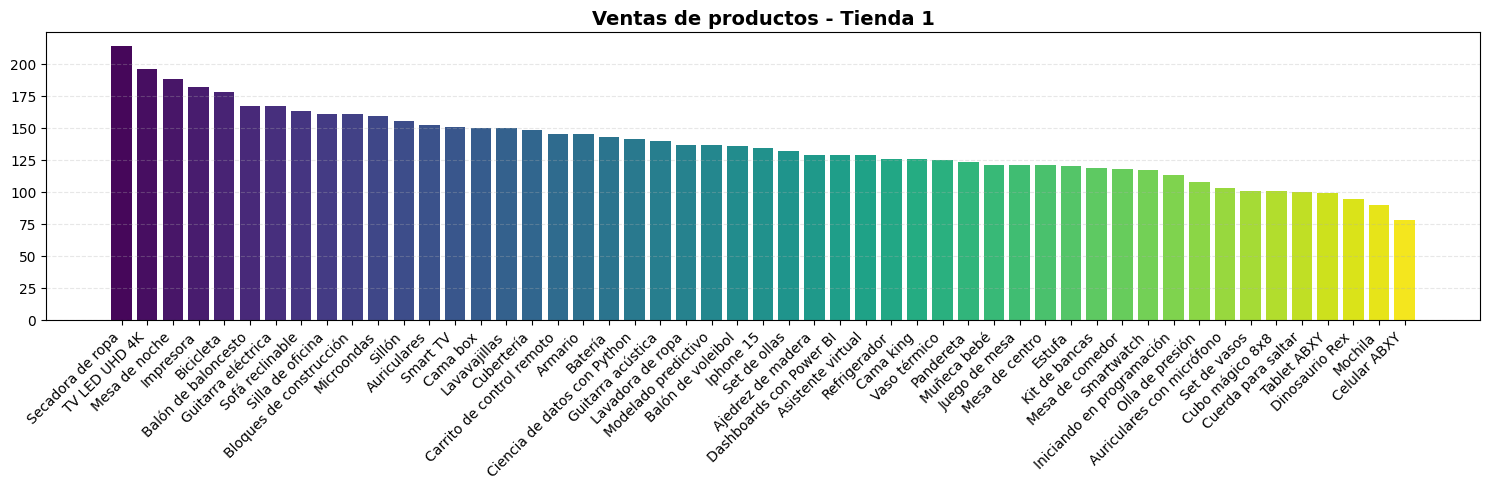

In [76]:
# Tienda 1
# Datos agrupados
ventas = (tienda.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).reset_index())

# Paleta moderna (gradiente)
colors = sns.color_palette("viridis", len(ventas))

# Gráfico
plt.figure(figsize=(15,5))
bars = plt.bar(ventas['Producto'], ventas['Cantidad de cuotas'], color=colors)

plt.title('Ventas de productos - Tienda 1', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

> En la **Tienda 1**, los productos con mayor demanda corresponden a:
> - **Secadora de ropa**
> - **TV LED UHD 4K**
> - **Mesa de noche**
>
> Por otro lado, los artículos con **menor rotación de ventas** fueron:
> - **Celular ABXY**
> - **Mochila**
> - **Dinosaurio Rex**


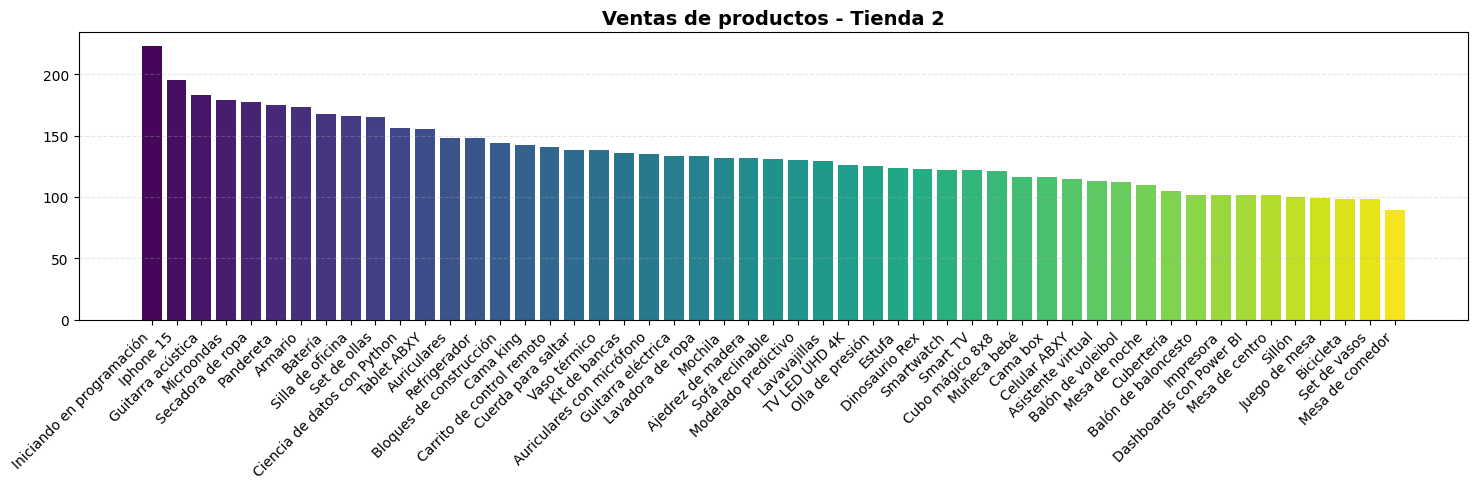

In [77]:
# Tienda 2
# Datos agrupados
ventas = (tienda2.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).reset_index())

# Paleta moderna (gradiente)
colors = sns.color_palette("viridis", len(ventas))

# Gráfico
plt.figure(figsize=(15,5))
bars = plt.bar(ventas['Producto'], ventas['Cantidad de cuotas'], color=colors)

plt.title('Ventas de productos - Tienda 2', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

> En la **Tienda 2**, los productos con mayor demanda corresponden a:
> - **Iniciando en programación**
> - **Iphone 15**
> - **Guitarra acústica**
>
> Por otro lado, los artículos con **menor rotación de ventas** fueron:
> - **Mesa de comedor**
> - **Set de vasos**
> - **Bicicleta**


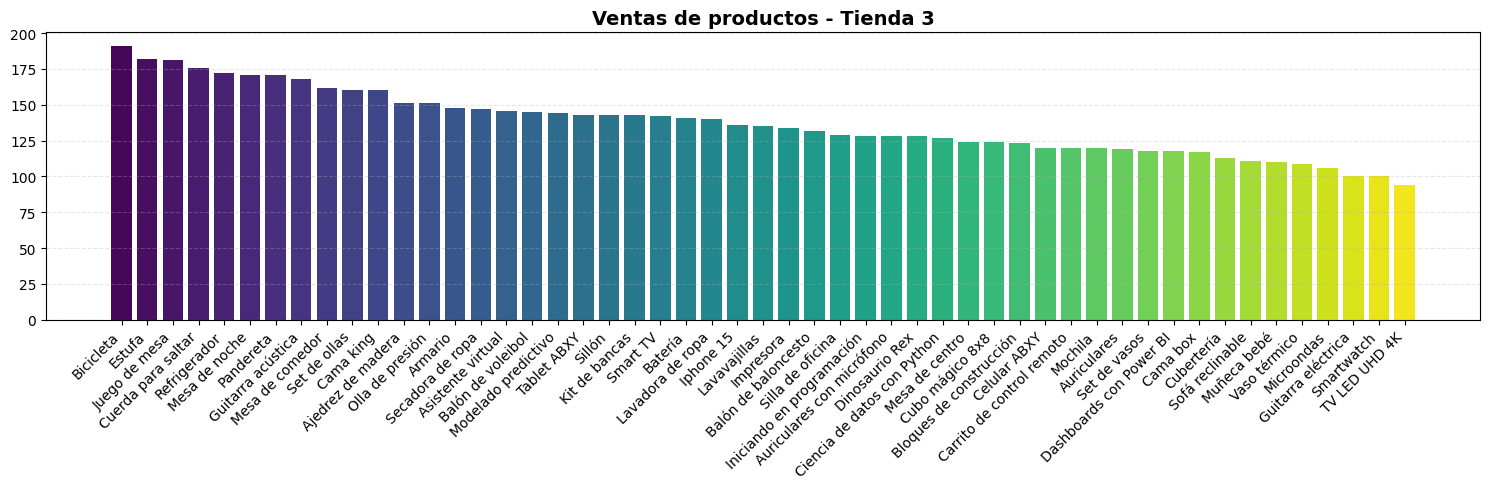

In [78]:
# Tienda 3
# Datos agrupados
ventas = (tienda3.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).reset_index())

# Paleta moderna (gradiente)
colors = sns.color_palette("viridis", len(ventas))

# Gráfico
plt.figure(figsize=(15,5))
bars = plt.bar(ventas['Producto'], ventas['Cantidad de cuotas'], color=colors)

plt.title('Ventas de productos - Tienda 3', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

> En la **Tienda 3**, los productos con mayor demanda corresponden a:
> - **Bicicleta**
> - **Estufa**
> - **Juego de mesa**
>
> Por otro lado, los artículos con **menor rotación de ventas** fueron:
> - **TV LED UHD 4K**
> - **Smartwatch**
> - **Guitarra eléctrica**


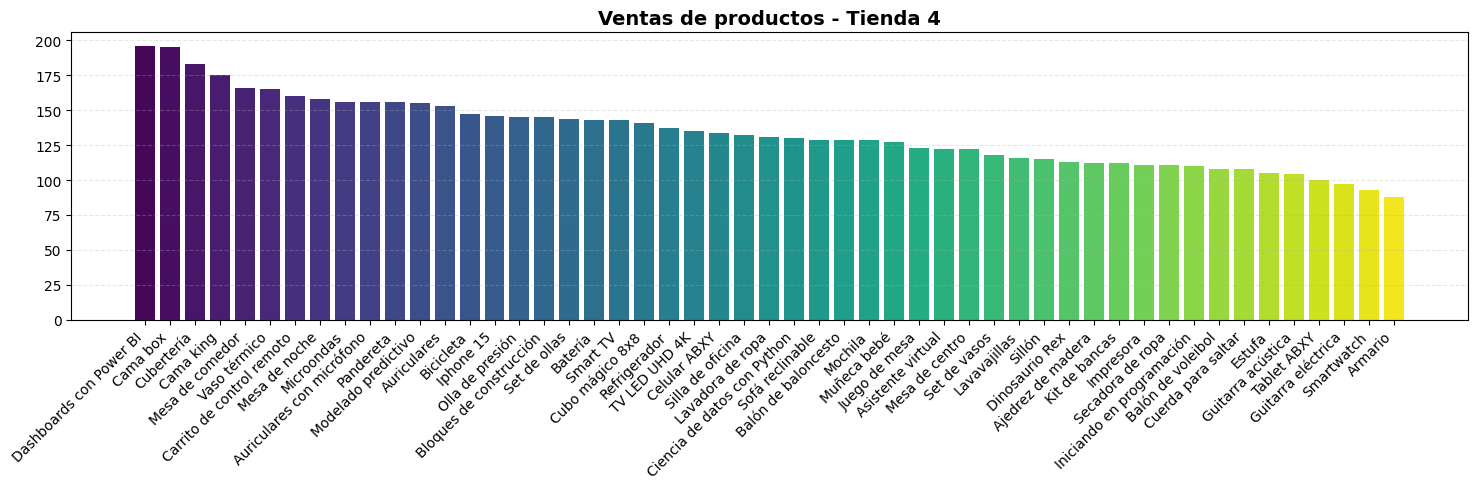

In [79]:
# Tienda 4
# Datos agrupados
ventas = (tienda4.groupby('Producto')['Cantidad de cuotas'].sum().sort_values(ascending=False).reset_index())

# Paleta moderna (gradiente)
colors = sns.color_palette("viridis", len(ventas))

# Gráfico
plt.figure(figsize=(15,5))
bars = plt.bar(ventas['Producto'], ventas['Cantidad de cuotas'], color=colors)

plt.title('Ventas de productos - Tienda 4', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

> En la **Tienda 4**, los productos con mayor demanda corresponden a:
> - **Dashboards con Power BI**
> - **Cama box**
> - **Cubernetería**
>
> Por otro lado, los artículos con **menor rotación de ventas** fueron:
> - **Armario**
> - **Smartwatch**
> - **Guitarra eléctrica**

# 5. Envío promedio por tienda

In [82]:
print("Tienda 1")
print(f"El costo promedio de envío es: {round(tienda['Costo de envío'].mean(),2)}")

Tienda 1
El costo promedio de envío es: 26018.61


In [86]:
print("Tienda 2")
print(f"El costo promedio de envío es: {round(tienda2['Costo de envío'].mean(),2)}")

Tienda 2
El costo promedio de envío es: 25216.24


In [87]:
print("Tienda 3")
print(f"El costo promedio de envío es: {round(tienda3['Costo de envío'].mean(),2)}")

Tienda 3
El costo promedio de envío es: 24805.68


In [88]:
print("Tienda 4")
print(f"El costo promedio de envío es: {round(tienda4['Costo de envío'].mean(),2)}")

Tienda 4
El costo promedio de envío es: 23459.46
